# Predict Wine Quality with Regularization

The project aims to build a machine learning model with regularization, which classifies wine quality as good (>5 rating) or bad (<=5 rating). 

In this project, it will implement various logistic regresssion classifiers, find the best ridge-regulatized classfier using hyperparameter tuning, and implement a tuned lasso-regularized feature selection method.

*The data using in this project is from the [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality) in the UCI Machine Learning Repository.

### Import Python Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import f1_score

Take a look on the dataset and get a basic understanding on what the dataset contains. There are 11 input variables and one output variable `quality`.

In [2]:
with open ('winequality.names') as f:
    print(f.read())

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [3]:
red = pd.read_csv('winequality-red.csv', sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Preprocess the data

Convert the `quality` data into a value of 0 or 1, where 0 (bad) for any original values less than or equal to 5 and 1 (good) for any original values greater than 5.

In [4]:
red['quality'] = red.quality.apply(lambda x: 0 if x<=5 else 1)

In [5]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Separate the features and output variable for the model use in later time.

In [6]:
features = red.drop(columns = ['quality'])
y = red['quality']

Scale the data and transform it to obtain the input data for the model.

In [7]:
sData = StandardScaler().fit(features)
X = sData.transform(features)

Split the data into training set and test set.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.2)

### Build a Model
Establish a logistic regression model with no regularization and create a bar plot of the coefficients obtained from fitting the model.

In [9]:
clf_no_reg = LogisticRegression(penalty = None)
clf_no_reg.fit(X_train, y_train)

LogisticRegression(penalty=None)

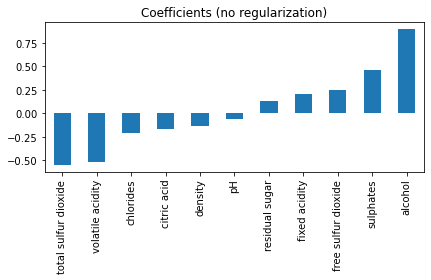

<Figure size 432x288 with 0 Axes>

In [10]:
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

It is important that the classifer has high accuracy, high precision and recall. Calculate the f1 score for the training and test data.

In [11]:
y_pred_train = clf_no_reg.predict(X_train)
y_pred_test = clf_no_reg.predict(X_test)
print('Training Score: ', f1_score(y_train, y_pred_train))
print('Test Score: ', f1_score(y_test, y_pred_test))

Training Score:  0.7727598566308244
Test Score:  0.7266666666666667


Now, build another Logistic Regression model with L2-regularized.

In [12]:
clf_default = LogisticRegression()
clf_default.fit(X_train, y_train)

LogisticRegression()

Calculate the f1_score using the L2-regularized model. The f1_score remains the same as the model with no regularization. This means the constraint boundary for the regularization is large enough to hold the originial loss function minimum. 

In [13]:
y_pred_train_l2 = clf_default.predict(X_train)
y_pred_test_l2 = clf_default.predict(X_test)
print('Ridge-regularized Training Score: ', f1_score(y_train, y_pred_train_l2))
print('Ridge-regularized Test Score: ', f1_score(y_test, y_pred_test_l2))

Ridge-regularized Training Score:  0.7727598566308244
Ridge-regularized Test Score:  0.7266666666666667


### Tuning Hyperparameter
Adjust the value of *alpha* to increase the strength of regularization.

In [14]:
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.001, 0.1, 1]
for C in C_array:
    clf = LogisticRegression(C=C)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_score = f1_score(y_train, y_pred_train)
    test_score = f1_score(y_test, y_pred_test)
    training_array.append(train_score)
    test_array.append(test_score)

The following plot shows the optimal *alpha* value somewhere around 0.001. Search the *alpha* between 0.0001 to 0.01 is reasonable.

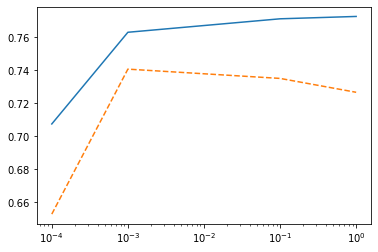

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(C_array, training_array)
plt.plot(C_array, test_array, '--')
plt.xscale('log')
plt.show()
plt.clf()

Perform hyperparameter tuning using `GridSearchCV`.

In [16]:
C_array = np.logspace(-4, -2, 100)
tuning_C = {'C': C_array}

In [17]:
clf_gs = LogisticRegression()
gs = GridSearchCV(clf_gs, tuning_C, scoring='f1', cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.0001    , 0.00010476, 0.00010975, 0.00011498, 0.00012045,
       0.00012619, 0.00013219, 0.00013849, 0.00014508, 0.00015199,
       0.00015923, 0.00016681, 0.00017475, 0.00018307, 0.00019179,
       0.00020092, 0.00021049, 0.00022051, 0.00023101, 0.00024201,
       0.00025354, 0.00026561, 0.00027826, 0.00029151, 0.00030539,
       0.00031...
       0.00205651, 0.00215443, 0.00225702, 0.00236449, 0.00247708,
       0.00259502, 0.00271859, 0.00284804, 0.00298365, 0.00312572,
       0.00327455, 0.00343047, 0.00359381, 0.00376494, 0.00394421,
       0.00413201, 0.00432876, 0.00453488, 0.00475081, 0.00497702,
       0.00521401, 0.00546228, 0.00572237, 0.00599484, 0.00628029,
       0.00657933, 0.00689261, 0.00722081, 0.00756463, 0.00792483,
       0.00830218, 0.00869749, 0.00911163, 0.00954548, 0.01      ])},
             scoring='f1')

In [18]:
print('The best C value is: ', gs.best_params_)
print('The best f1_score corresponds to the best C:', gs.best_score_)

The best C value is:  {'C': 0.0020565123083486517}
The best f1_score corresponds to the best C: 0.7725370086010586


Use the best C value obtained above along with a classifer that fits to the training data. Calculate the f1 score on the test data of this classifier to validate the model.

In [19]:
clf_best_ridge = LogisticRegression(C=gs.best_params_['C'])
clf_best_ridge.fit(X_train, y_train)
y_pred_best = clf_best_ridge.predict(X_test)
print('The f1_score corresponds to the best C:', f1_score(y_test, y_pred_best))

The f1_score corresponds to the best C: 0.735202492211838


### Feature Selection using L1 Regularization
Regularize the classifier using a grid search cross-validation method with L1 regularization.

In [20]:
clf_l1 = LogisticRegressionCV(Cs = np.logspace(-2, 2, 100), \
                              cv=5, penalty='l1', solver='liblinear', \
                              scoring='f1')
clf_l1.fit(X, y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, penalty='l1', scoring='f1', solver='liblinear')

In [21]:
print('Best C value:', clf_l1.C_)
print('Best fit coefficients:', clf_l1.coef_)

Best C value: [0.25950242]
Best fit coefficients: [[ 0.1164116  -0.55634012 -0.17263308  0.03123354 -0.17328172  0.20056284
  -0.50584501  0.         -0.07041311  0.4322236   0.9410173 ]]


Plot the coefficients for the L1 regularization. The plot indicates that the L1 classifier eliminated one feature, `density`.

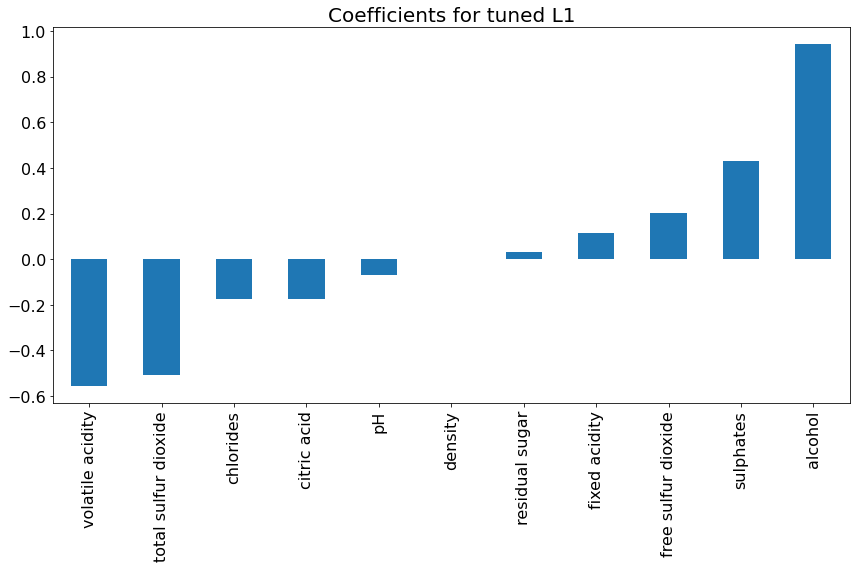

<Figure size 432x288 with 0 Axes>

In [22]:
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()

plt.figure(figsize=(12,8))
coef.plot(kind='bar', fontsize=16)
plt.title('Coefficients for tuned L1', fontsize=20)
plt.tight_layout()
plt.show()
plt.clf()